In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54
###

In [3]:
N = 1000000 # length of the simulation
tau = 0.01 # simulation time step
m = 1e-8 # particle mass
a = 1e-6 # radius of the particle 
eta = 0.001 # viscosity (here water)
gamma = 6 * np.pi * eta * a
kbT = 4e-21
tauB = m/gamma

In [4]:
tauB

0.5305164769729845

In [5]:
def xi(xi1, xi2):
    t = tau / tauB
    wi = np.random.normal(0, np.sqrt(tau))
    return (
        (2 + t) / (1 + t) * xi1
        - 1 / (1 + t) * xi2
        + np.sqrt(2 * kbT * gamma) / (m * (1 + t)) * tau * wi
    )


In [6]:
x = np.zeros(N)

for i in range(2, len(x)):
    x[i] = xi(x[i-1], x[i-2])


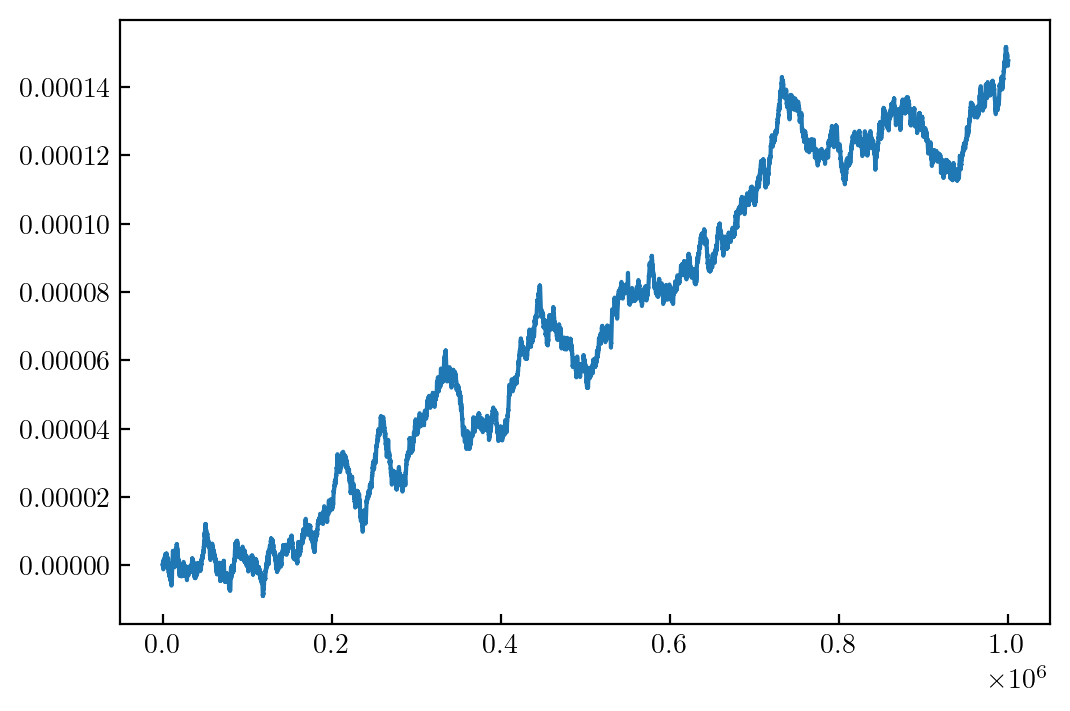

In [7]:
plt.plot(x)

In [8]:
t = np.array([*np.arange(1,10,1), *np.arange(10,100,10), *np.arange(100,1000,100), *np.arange(1000,10000,1000)])
def msd(x,t):
    _msd = lambda x, t : np.mean((x[:-t] - x[t:])**2)
    return [_msd(x,i) for i in t]


In [9]:
MSD = msd(x,t)


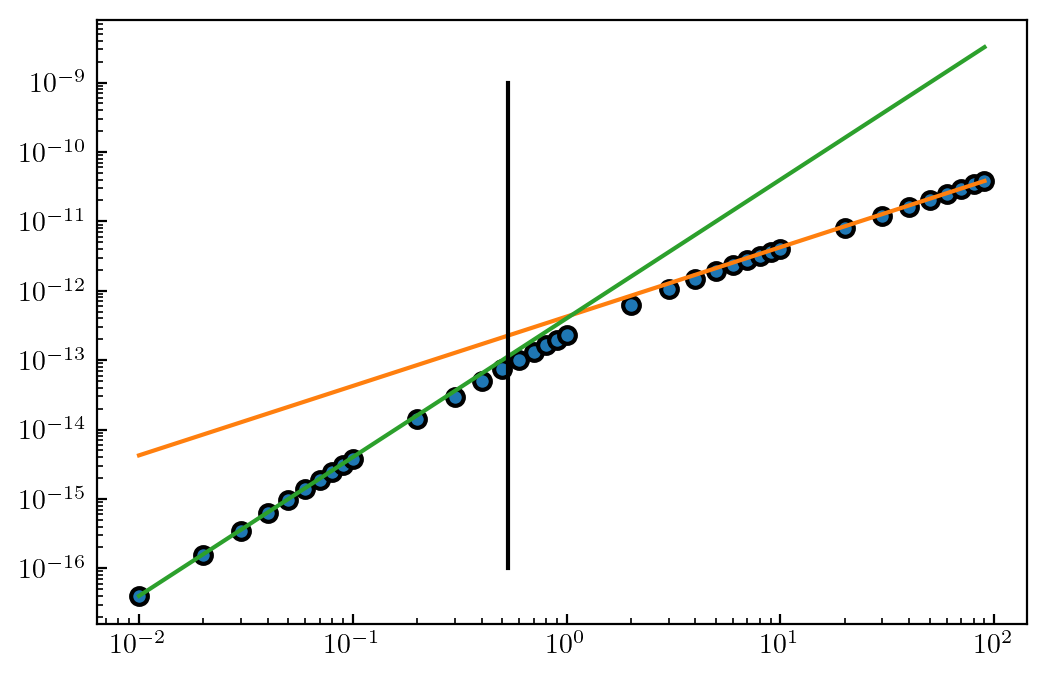

In [10]:
D = kbT/(6*np.pi*eta*a)
t_plot = t*tau
plt.loglog(t*tau,MSD, "o")
plt.plot(t*tau, (2*D*t_plot))
plt.plot(t*tau, kbT/m * t_plot**2)

horiz_data = [1e-9, 1e-16]
t_horiz = [tauB, tauB]
plt.plot(t_horiz, horiz_data, "k")

In [11]:
%timeit msd(x,t)

102 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
%load_ext Cython

In [5]:
%%cython
import setuptools
import numpy as np
cimport numpy as np
from libc.math cimport sqrt


cdef int N = 1000000 # length of the simulation
cdef float tau = 0.01 # simulation time step
cdef float m = 1e-8 # particle mass
cdef float a = 1e-6 # radius of the particle 
cdef float eta = 0.001 # viscosity (here water)
cdef float gamma = 6 * 3.14 * eta * a
cdef float kbT = 4e-21
cdef float tauB = m/gamma
cdef float[:] wi = np.random.normal(0, np.sqrt(tau), N)
cdef float[:] x = np.zeros(N)

cdef float xi_cython(xi1, xi2, wi):
    cdef float t = tau / tauB
    return (
        (2 + t) / (1 + t) * xi1
        - 1 / (1 + t) * xi2
        + sqrt(2 * kbT * gamma) / (m * (1 + t)) * np.power(tau,1) * wi
    )


def traj():
    cdef int i
    for i in range(2, N):
        x[i] = xi_cython(x[i-1], x[i-2], wi[i])

TypeError: dist must be a Distribution instance